## Web scrapping using python

#### References
1. [Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
2. [Web Scraping using Python](https://www.datacamp.com/community/tutorials/web-scraping-using-python)

In [78]:
# $ python3 -m venv venv
# $ . ./venv/bin/activate

In [79]:
#Better
!pip install requests BeautifulSoup4 fire
#!pip install -U selenium
!pip install tweepy


In [80]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.common.by import By
from itertools import groupby 
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import tweepy

import pandas as pd
import os, sys
import re
import requests
import csv

import fire


import seaborn as sns
import matplotlib.pyplot as plt


In [81]:
#%%writefile ../pyscrap_url.py
consumer_key = 'kvnn24OSMIZUhGbwDRzsewd5O'
consumer_secret = 'MlHSnjKRaImy8du3IneLwfCAYGx68YxDxCgDM9NzqT99fJE8GG'
access_token = '2464951318-uoIugK2ezAfRoJrnRRBQybIxWvNMOsUo7NGTI02'
access_token_secret = 'drqPjAOkKV6l6qUIJysmG8ZzVcx0H1cIxRDYPdMwx96pT'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth)
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('finding all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [82]:
url=('https://africafreak.com/100-most-influential-twitter-users-in-africa')
response=simple_get(url)
res=get_elements(response, tag='h2', search={'find_all': {'class_': 'twitter-tweet'}})
str_cells=str(res)
cleantext2=BeautifulSoup(str_cells,"lxml").get_text()
#print(cleantext2)

finding all of {'class_': 'twitter-tweet'}


In [83]:
dataa=[]
for item in res:
    if '(@' in item:
        cleant = re.compile(r'@(\w*)')
        cleant2=(re.search(cleant,item))        
        if cleant2.group(0) is not None:
            dataa.append({'value': cleant2.group(0) })        
df=pd.DataFrame(dataa)
df.columns = ["Top 10 African Influencers twitter Handles"]
df1=df.sort_index(ascending=True)
df2=df1.head(101)
df2.to_csv(r'african_influencers.csv', index = False)
#df2

#print(df1.head(10).to_csv(r'african_influencers.csv'))



In [84]:
users= []
index=0
while index < 100:
    users.append(df2.iat[index,0])
    index=index+1
#print(users)
    

In [85]:
for target in users:
    #print("Getting data for " + target)
    try:
      item = auth_api.get_user(target)
      print("name: " + item.name)
      print("screen_name: " + item.screen_name)
      print("description: " + item.description)
      print("statuses_count: " + str(item.statuses_count))
      print("friends_count: " + str(item.friends_count))
      print("followers_count: " + str(item.followers_count))
    except tweepy.error.TweepError:
      pass
      #print("user not found")
    

name: Jeffrey Gettleman
screen_name: gettleman
description: South Asia bureau chief for the New York Times. Author of Love, Africa, a memoir. Winner of the Pulitzer Prize. Retweets do not equal endorsements.
statuses_count: 3770
friends_count: 37
followers_count: 25705
name: A24 Media
screen_name: a24media
description: Africa 24 produces compelling content that makes people want to peek, or gawk, or listen up. Our video creates emotion. Our shows make you think!

@yebo_live
statuses_count: 16869
friends_count: 3059
followers_count: 31287
name: Scapegoat
screen_name: AndiMakinana
description: In pursuit of scoops. I do not write headlines. In an abusive relationship with the mighty and glorious Buccaneers @Orlando_Pirates. @MikeTyson is the greatest.
statuses_count: 142232
friends_count: 2838
followers_count: 101287
name: Africa Check
screen_name: AfricaCheck
description: Africa's first independent fact-checking website. Keeping debate honest. Seen a claim that needs to be fact-checked?

In [86]:
#calculating popularity score and save to csv
my_demo=[]
for targeter in users:
    try:         #this is to catch an error incase the twitter username doesnot exist
        print("Getting data for " + targeter)             #shows the user we are getting data from
        tweets = auth_api.user_timeline(screen_name=targeter  ,count=5)            #collects most recent 5 tweets
        new_tweets=auth_api.user_timeline(targeter)
        tweet_list = [tweet for tweet in tweets]     
        #alltweets.extend(new_tweets)
        item_1 = auth_api.get_user(targeter)
        name=item_1.screen_name
        followers=item_1.followers_count
        friends=item_1.friends_count
        tweets=item_1.statuses_count  
        account_created_date=item_1.created_at
        delta=datetime.utcnow()-account_created_date
        reach=followers-friends
        account_age_days=delta.days
        #print(tweet_list)        #store the tweets in a array
        counter = 0              #initialize retweet counter to zero
        favcounter= 0        #initialize like counter to zero
        rtcounter=0
        ftcounter=0
        for tweet in tweet_list:    #for each tweet in the tweet list
            #print(tweet)
            retweetcount = tweet.retweet_count         #get the retweet count of that tweet
            rtcounter+=retweetcount
            favorite = tweet.favorite_count              #get the likes of that tweet
            ftcounter+=favorite
            counter += retweetcount              #updating total number of retweets
            favcounter += favorite         #updating total number of likes
            
            print(tweet.text)
            print('number of retweets ' , retweetcount)        #this shows the number of retweets in a post so that i can confirm fromthe users twitter page if the data is correct
            print('number of likes ' , favorite)
            popularity_score = retweetcount + favorite   #calculates popularity score of the user
            print(popularity_score)
        print(rtcounter)
        print(ftcounter)
        popularity_score = rtcounter + ftcounter   #calculates popularity score of the user
        my_demo.append({'name':str(name),
                         'Number of followers':int(followers),
                        'Number of Tweets': int(tweets),
                         'reach score':int(reach),
                        'popularity score':int(popularity_score),
                        'retweet count':int(rtcounter),

                          'created_at': account_created_date,
                          'account_age(days)': account_age_days,
                              })
        tweet_d=pd.DataFrame(my_demo,columns=['name',
                                                'Number of followers',
                                                'Number of Tweets',
                                                'reach score',
                                                'popularity score',
                                                'retweet count',
                                                'created_at',
                                                'account_age(days)'])
                                                
    except tweepy.TweepError :
        pass
#tweet_d
# tweet_d.to_csv(r'newtweets.csv', index = False)
# tweet_d.sort_values(by=["Number of followers"],ascending=False,ignore_index=True)
# x=popularity_score
# y=name
# cs = pd.read_csv('newtweets.csv')
#fig_dims = (50,50)
#fig, ax = plt.subplots(figsize=fig_dims)

#sns.barplot(x="popularity score",y="name",data=cs )
#plt.title("popularity score of african influencers")



Getting data for @gettleman
RT @timesofindia: Ladakh: Indian paratroopers jump from an altitude of 16,000 feet

Indian paratroopers dived off C-130J Hercules aircraft…
number of retweets  463
number of likes  0
463
What an inspiring interchange. Way to go Luke! https://t.co/YF3xldYczZ
number of retweets  1
number of likes  5
6
It's a fantastic school. Congrats, farmer's son! https://t.co/647fiq4Yy7
number of retweets  1
number of likes  28
29
RT @ndtv: 99 Doctors Died Due To COVID-19, Says Indian Medical Association; Issues "Red Alert"

@SukirtiDwivedi brings in the latest https:…
number of retweets  112
number of likes  0
112
RT @shaikubaid: Specter of Caste in Silicon Valley  Gr8 oped in ⁦@nytimes⁩ ⁦@nytopinion⁩ ⁦@ABarnardNYT⁩ ⁦@rcallimachi⁩ ⁦@NickKristof⁩ ⁦@Abi…
number of retweets  3
number of likes  0
3
580
33
Getting data for @a24media
Did you know that you can get updates on the discussion panel after our Friday watch party? Subscribe to our YouTub… https://t.co/nRjoH0o8iR
number

In [87]:
tweet_d
tweet_d.to_csv(r'newtweets.csv', index = False)
tweet_d.sort_values(by=["Number of followers"],ascending=False,ignore_index=True)


,name,Number of followers,Number of Tweets,reach score,popularity score,retweet count,created_at,account_age(days)
0,Trevornoah,10808880,11186,10808555,231776,106652,2009-06-11 07:03:48,4056
1,News24,3578272,322921,3577641,92,21,2008-05-08 07:45:58,4455
2,Julius_S_Malema,3129948,37220,3129296,2267,2267,2010-02-24 14:58:49,3798
3,GarethCliff,1974669,31626,1974313,760,711,2008-12-08 13:20:23,4241
4,euphonik,1755587,4535,1755522,202,9,2009-02-18 18:36:47,4168
...,...,...,...,...,...,...,...,...
88,SmithInAfrica,69,1,69,1,1,2015-10-19 23:34:14,1734
89,SAPresident,18,19,4,38,38,2019-03-04 09:59:11,503
90,stateafrica,8,1,8,1,0,2017-06-12 09:53:56,1133
91,BBCAndrewH,7,6,7,1,0,2018-04-27 05:48:52,814


Text(0.5, 1.0, 'popularity score of african influencers')

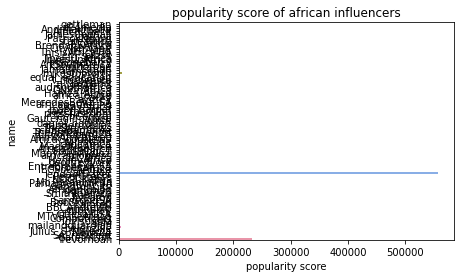

In [88]:
x=popularity_score
y=name
cs = pd.read_csv('newtweets.csv')
sns.barplot(x="popularity score",y="name",data=cs )
plt.title("popularity score of african influencers")

In [89]:
def get_tweet_details(username):
  hashtags = []
  mentions = []
  tweet_count = 0
  end_date = datetime.utcnow() - timedelta(days=30)
  for status in Cursor(auth_api.user_timeline, id=username).items():
    tweet_count += 1
    if hasattr(status, "entities"):
      entities = status.entities
      if "hashtags" in entities:
        for ent in entities["hashtags"]:
          if ent is not None:
            if "text" in ent:
              hashtag = ent["text"]
              if hashtag is not None:
                hashtags.append(hashtag)
      if "user_mentions" in entities:
        for ent in entities["user_mentions"]:
          if ent is not None:
            if "screen_name" in ent:
              name = ent["screen_name"]
              if name is not None:
                mentions.append(name)
      if status.created_at < end_date:
        break
  return {
      'hashtags': hashtags,
      'mentions': mentions,
      'count': tweet_count
  }


In [90]:
def get_hashtags(user):
  try:
    hashuser = auth_api.get_user(user)
    user_name=hashuser.screen_name
    #print("printing user details for "+user)
    details=get_tweet_details(user)
    hash=Counter(details['hashtags']).most_common(20)
    return {'user_name': user, 'hashtags': hash}
  except tweepy.TweepError:
    #print('Treepy Error!!')
    return 
  
def arrange_user_hashtags():
  user_hashtags=[]
  for user in users:
    hash=get_hashtags(user)
    user_hashtags.append(hash)
  return user_hashtags

user_details=arrange_user_hashtags()
user_details

[{'hashtags': [('PLA', 1),
   ('IndianArmy', 1),
   ('COVID19', 1),
   ('GalwanValley', 1),
   ('InternationalYogaDay', 1)],
  'user_name': '@gettleman'},
 {'hashtags': [('YeboWatchParty', 9),
   ('UnpackAfricaOnYebo', 3),
   ('KenSaroWiwa', 2),
   ('JuliusNyerere', 2),
   ('Tanzania', 2),
   ('mondaythoughts', 2),
   ('Nkoloso', 1),
   ('AsteroidDay', 1),
   ('IdentitySeries', 1),
   ('MondayMotivaton', 1),
   ('TzHistory', 1),
   ('yebodidyouknow', 1)],
  'user_name': '@a24media'},
 {'hashtags': [('EasternCape', 3),
   ('sabcnews', 3),
   ('CapeTown', 3),
   ('Covid19', 2),
   ('pics', 2),
   ('Get2GetherExperience', 2),
   ('Overheard', 1),
   ('presidentialimbizo', 1),
   ('LifeEsidimeni', 1),
   ('COVID19SA', 1),
   ('CarteBlanche', 1),
   ('Loadshedding', 1),
   ('TheRiver1Magic', 1),
   ('Covid', 1),
   ('ThrowbackThursday', 1),
   ('ColdFront', 1),
   ('Parliament', 1),
   ('ZilandileXulu', 1),
   ('Covid19SA', 1),
   ('andizi', 1)],
  'user_name': '@andiMakinana'},
 {'hashtags

In [91]:
sub_list=['coronavirus','covid19','kenya','covid','africa']
hashtag_grouping={}
for sub in sub_list:
  hashtag_grouping[sub] = []
  for item in user_details:
    if item is not None:
      if sub in str(item['hashtags']).lower():
        hashtag_grouping[sub].append(item['user_name'])

new_hashtag_grouping={}
for key in hashtag_grouping.keys():
  new_hashtag_grouping[key]= str(hashtag_grouping[key])

# pd.DataFrame({ key:pd.Series(value) for key, value in mydict.items() })

df = pd.DataFrame({key: pd.Series(value) for key, value in hashtag_grouping.items()})
#df.to_csv(r'influencerhashtagas.csv', index = False)

df


,coronavirus,covid19,kenya,covid,africa
0,@AfricaCheck,@gettleman,@AfricaCheck,@gettleman,@a24media
1,@sarzss,@andiMakinana,@Moadow,@andiMakinana,@AfricaCheck
2,@Hamza_Africa,@AfricaCheck,@JamalMOsman,@AfricaCheck,@JamesCopnall
3,@mary_harper,@Moadow,@t_mcconnell,@Moadow,@ThisIsAfricaTIA
4,@pressfreedom,@CityTshwane,@africatechie,@CityTshwane,@malonebarry
5,@GautengProvince,@sarzss,@theafricareport,@sarzss,@artsouthafrica
6,@theafricareport,@malonebarry,@MadeItInAfrica,@malonebarry,@JamalMOsman
7,@MbuyiseniNdlozi,@equal_education,@IFCAfrica,@equal_education,@equal_education
8,NaN,@ONEinAfrica,@geoffreyyork,@ONEinAfrica,@audisouthafrica
9,NaN,@africatechie,NaN,@africatechie,@ONEinAfrica


<function matplotlib.pyplot.show>

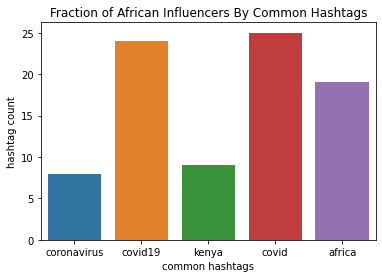

In [92]:
x=sub_list
y=[len(value) for key, value in hashtag_grouping.items()]
#fig_dims1 = (15,15)
#fig, ax = plt.subplots(figsize=fig_dims1)
sns.barplot(x,y)
plt.title("Fraction of African Influencers By Common Hashtags")
plt.xlabel("common hashtags")
plt.ylabel("hashtag count")
plt.show

In [93]:
for user1 in users:
  try:
    #print("printing user details for "+user1)
    details1=get_tweet_details(user1)
    mention=Counter(details1['mentions']).most_common(3)
    #print(*mention, sep="\n")
  except tweepy.TweepError:    
    #print("user not found")
    pass


In [94]:
for user2 in users:
    details3=get_tweet_details(user2)
    mention1=Counter(details1['count']).most_common(3)
    c=details3['count']
    print("All done.Processed",c, "tweets for ", user2)


TweepError: ignored

In [ ]:
url2= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url2)

In [ ]:
res1 = get_elements(response, search={'find_all':{'class_':'twitter-tweet'}})
#res1
str_cells2=str(res1)
cleantext=BeautifulSoup(str_cells2,"lxml").get_text()
#print(cleantext.split(""))
data=[]
for item in cleantext.split("20,"):
    clean=re.compile(r'@(\w*)')
    clean2=re.search(clean,item)
    if clean2 is not None:
        data.append({'value': clean2.group(0) })
    
ldf=pd.DataFrame(data)
ldf.columns = ["Twitter Handles of 10 African leaders"]
ldf1=df.head(10)
ldf1.to_csv(r'african_leaders.csv', index = False)
ldf

#print(df1.head(10).to_csv(r'african_influencers.csv'))

In [ ]:
leaders= []
index=0
while index < 36:
    leaders.append(ldf.iat[index,0])
    index=index+1
#print(leaders)

In [ ]:
for leader in leaders:
    print("Getting data for " + target)
    try:
        item = auth_api.get_user(leader)
        print("name: " + item.name)
        print("screen_name: " + item.screen_name)
        print("description: " + item.description)
        print("statuses_count: " + str(item.statuses_count))
        print("friends_count: " + str(item.friends_count))
        print("followers_count: " + str(item.followers_count))
    except tweepy.error.TweepError:
      pass
       # print("user not found")
    

In [ ]:
my_leaders=[]
for leader1 in leaders:
    try:         #this is to catch an error incase the twitter username doesnot exist
        print("Getting data for " + targeter)             #shows the user we are getting data from
        tweets1 = auth_api.user_timeline(screen_name=leader1  ,count=5)            #collects most recent 5 tweets
        new_tweets1=auth_api.user_timeline(leader1)
        tweet_list1 = [tweet1 for tweet1 in tweets1]     
        #alltweets.extend(new_tweets)
        item_11 = auth_api.get_user(leader1)
        name1=item_11.screen_name
        followers1=item_11.followers_count
        friends1=item_11.friends_count
        tweets1=item_11.statuses_count  
        account_created_date1=item_11.created_at
        delta1=datetime.utcnow()-account_created_date1
        reach1=followers1-friends1
        account_age_days1=delta1.days
        #print(tweet_list)        #store the tweets in a array
        counter1 = 0              #initialize retweet counter to zero
        favcounter1= 0        #initialize like counter to zero
        rtcounter1=0
        ftcounter1=0
        for tweet1 in tweet_list1:    #for each tweet in the tweet list
            #print(tweet)
            retweetcount1 = tweet1.retweet_count         #get the retweet count of that tweet
            rtcounter1+=retweetcount1
            favorite1 = tweet1.favorite_count              #get the likes of that tweet
            ftcounter1+=favorite1
            counter1 += retweetcount1              #updating total number of retweets
            favcounter1 += favorite1         #updating total number of likes
            
            print(tweet.text)
            print('number of retweets ' , retweetcount)        #this shows the number of retweets in a post so that i can confirm fromthe users twitter page if the data is correct
            print('number of likes ' , favorite)
            popularity_score = retweetcount + favorite   #calculates popularity score of the user
            print(popularity_score)
       print(rtcounter)
       print(ftcounter)
        popularity_score1 = rtcounter1 + ftcounter1   #calculates popularity score of the user
        my_leaders.append({'name':str(name1),
                         'Number of followers':int(followers1),
                        'Number of Tweets': int(tweets1),
                         'reach score':int(reach1),
                        'popularity score':int(popularity_score1),
                           'retweet count':int(rtcounter1),
                          'created_at': account_created_date1,
                          'account_age(days)': int(account_age_days1),
                              })
        leaders_tweets=pd.DataFrame(my_leaders,columns=['name',
                                                'Number of followers',
                                                'Number of Tweets',
                                                'reach score',
                                                'popularity score',
                                                'retweet count',
                                                'created_at',
                                                'account_age(days)'])
    except tweepy.TweepError :
        pass
leaders_tweets
leaders_tweets.to_csv(r'newtweetsleaders.csv', index = False)
leaders_tweets.sort_values(by=["Number of followers"],ascending=False,ignore_index=True)

In [ ]:
def arrange_user_hashtags_leaders():
  user_hashtags=[]
  for leader in leaders:
    hash=get_hashtags(leader)
    user_hashtags.append(hash)
  return user_hashtags

leader_details=arrange_user_hashtags_leaders()
leader_details

In [ ]:
sub_list_leaders=['coronavirus','covid19','hiv','covid','africa']
hashtag_grouping_leaders={}
for sub in sub_list_leaders:
  hashtag_grouping_leaders[sub] = []
  for item in leader_details:
    if item is not None:
      if sub in str(item['hashtags']).lower():
        hashtag_grouping_leaders[sub].append(item['user_name'])

new_hashtag_grouping_leaders={}
for key in hashtag_grouping_leaders.keys():
  new_hashtag_grouping_leaders[key]= str(hashtag_grouping_leaders[key])

# pd.DataFrame({ key:pd.Series(value) for key, value in mydict.items() })

dfl = pd.DataFrame({key: pd.Series(value) for key, value in hashtag_grouping_leaders.items()})
dfl.to_csv(r'leadershashtagas.csv', index = False)

dfl


In [ ]:
x=sub_list_leaders
y=[len(value) for key, value in hashtag_grouping_leaders.items()]
sns.barplot(x,y)
plt.title("Fraction of African Leaders By Common Hashtags")
plt.xlabel("common hashtags")
plt.ylabel("hashtag count")
plt.show